## Week 3 Lab exercises

In this week we will explore the concept of object oreinted programming (OOP) with classes, and the numerical solution of simple non linear ordinary differential equations (ODEs). 

In [1]:
# first we import the libraries we need
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches


# The following lines makes the plots appear inline in the notebook
%matplotlib inline

### ACTIVITY 1: 
I have written a class below for a Point object, which encapsulates the idea of a point and things we might want to do to it. 

Here you will write another class object for a Rectangle. You should consider and implement the following points:

1. What is the minimum information that is needed to fully describe a rectangle and its position in space? Assume for simplicity that its edges are aligned with the x and y axes.

2. Implement functions to:

    a. reflect the rectangle in the x and y axes
    
    b. grow the rectangle by an amount in x and y with the bottom left corner fixed
    
    c. grow the rectangle by an amount in x and y with the top right corner fixed
    
    d. plot the rectangle


3. What should be checked here? Can you add some asserts? Do you need to test the functions?

4. Would some of the methods needed make more sense to be implemented in the Points class instead of the Rectangle class? If so go ahead and edit it!

Point  P is 1.0 2.0
Point  Q is 4.0 7.5
Point  R is 5.0 9.5
Distance is  6.264982043070834
42


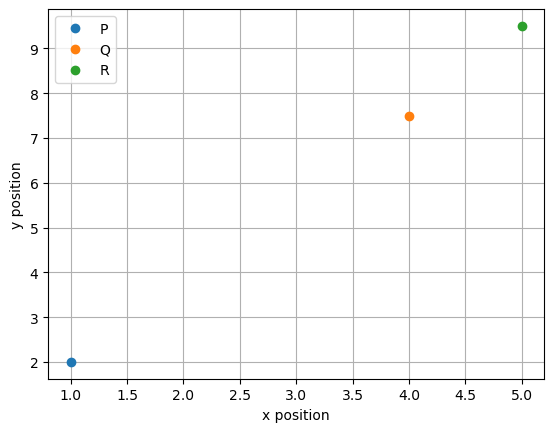

In [2]:
# Points class

class Point :
    """
    Represents a point in a 2D space
    
    attributes: x, y, name
    
    """
    
    # constructor function
    # The double underscores indicate a private method or variable
    # not to be accessed outside the class (in principle)
    def __init__(self, x=0.0, y=0.0, name = ""):
        self.x = x
        self.y = y
        self.name = name
        self.__private_variable = 42
        
    def __add__(self, other) :
        new_point = Point(self.x+other.x, self.y+other.y)
        return new_point
    
    def print_point(self) :
        print("Point ", self.name, "is", self.x, self.y)
        
    # Note that we don't use self here so don't need to pass it in
    # (This is a static function - it does not require an instance of the class)
    def calculate_distance_between_two_points(A, B) :
        return np.sqrt((A.x - B.x)**2.0 + (A.y - B.y)**2.0)
    
    def move_point(self,dx,dy) :
        self.x += dx
        self.y += dy
        
    def plot_point(self, ax) :
        ax.plot(self.x, self.y, 'o', label=self.name)
        
    def update_name(self, new_name) :
        self.name = new_name
        
        
# Some examples of using the Points class
first_point = Point(1.0,2.0,"P")
first_point.print_point()

second_point = Point(3.0,5.5,"Q")
second_point.move_point(1.0, 2.0)
second_point.print_point()

third_point = first_point + second_point
third_point.update_name("R")
third_point.print_point()

# Use the static function
distance = Point.calculate_distance_between_two_points(first_point,second_point)
print("Distance is ", distance)

plt.plot()
plt.grid()
plt.xlabel("x position")
plt.ylabel("y position")
ax = plt.gcf().gca()
first_point.plot_point(ax)
second_point.plot_point(ax)
third_point.plot_point(ax)
plt.legend()

# Try to access the private variable, even though you shouldn't
#print(first_point.__private_variable) # This won't work - try uncommenting it
print(first_point._Point__private_variable) # This will

# Can get info on the new class - uncomment to see this
# Point?

In [3]:
# Rectangle class

class Rectangle :
    """
    Represents a rectangle in a 2D space
    
    attributes: first_point (bottom left), second_point (top right), name
    
    """
    
    def __init__(self, first_point = Point(), second_point = Point(), name = "" ):
        self.first_point = first_point
        self.second_point = second_point
        self.dx = self.second_point.x-self.first_point.x
        self.dy = self.second_point.y-self.first_point.y
        self.check_rectangle() # stole this from KA
        self.name = name

    def update_dx_dy(self) :
        self.dx = self.second_point.x-self.first_point.x
        self.dy = self.second_point.y-self.first_point.y

    
    def check_rectangle(self) :
        assert (self.second_point.x > self.first_point.x) and (self.second_point.y > self.first_point.y), "Ensure point 1 is bottom left and point 2 is top right"


    def reflect_rectangle(self, axis="x") : # this should really be a reflect point in the previous class but cba
        assert axis == 'x' or axis == 'y', "No valid axis passed"
        if axis == 'x':
            new_y1 = -self.second_point.y
            new_y2 = -self.first_point.y
            self.first_point.y = new_y1
            self.second_point.y = new_y2
        else: # this case is for reflection in y-axis
            new_x1 = -self.second_point.x
            new_x2 = -self.first_point.x
            self.first_point.x = new_x1
            self.second_point.x = new_x2
        self.check_rectangle()
            
        
    def move_rectangle(self, dx, dy) :
        self.first_point.move_point(dx,dy)
        self.second_point.move_point(dx, dy)
        
    def grow_rectangle_fix_bottom_left(self, x_scale, y_scale) :
        self.second_point.x = self.first_point.x + self.dx*x_scale
        self.second_point.y = self.first_point.y + self.dy*y_scale
        self.update_dx_dy()

    def grow_rectangle_fix_top_right(self, x_scale, y_scale) : #this will be buggy
        self.first_point.x = self.second_point.x - (self.dx*(x_scale))
        self.first_point.y = self.second_point.y - (self.dy*(y_scale))
        self.update_dx_dy()
            
    def plot_rectangle(self, ax, color='black') :
        rect = patches.Rectangle((self.first_point.x,self.first_point.y),self.dx,self.dy,edgecolor=color,facecolor='none', linewidth=2)
        ax.add_patch(rect)
        return ax
        

    def update_name(self, new_name) :
        self.name = new_name

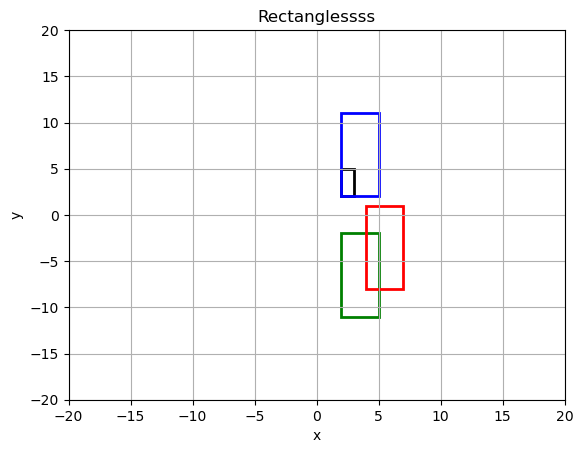

In [4]:
rect1= Rectangle(Point(2.0,2.0),Point(3.0,5.0))
rectangles = []

fig, ax = plt.subplots()
plt.grid()
ax.set(title='Rectanglessss',xlabel = 'x',ylabel='y',xlim=(-20,20),ylim=(-20,20))

rect1.plot_rectangle(ax)

rect1.grow_rectangle_fix_bottom_left(3,3)
rect1.plot_rectangle(ax,color = 'blue')

rect1.reflect_rectangle(axis = 'x')
rect1.plot_rectangle(ax,color = 'green')

rect1.move_rectangle(2,3)
rect1.plot_rectangle(ax,color = 'red')


plt.show()

### ACTIVITY 2: 

Now create a Square class that has the same functionality as the rectangle class, but that in addition has the ability to calculate its own area. You are not allowed to modify the Rectangle class.

_HINT: Do you really need to write a whole new function from scratch? What about inheritance?_


In [5]:
# Square class

class Square(Rectangle):

    """
    Represents a square in a 2D space
    
    attributes: first_point (bottom left), side length
    
    """

    def __init__(self, first_point = Point(), side_length = 1.0, name = "" ):
        second_point = Point(first_point.x+side_length,first_point.y+side_length)
        self._second_point = second_point
        self._first_point = first_point
        self._side_length = second_point.x-first_point.x
        assert self.dx == self.dy, "Not a valid square, must have same side lengths"


    def calculate_area(self):
        return (self.dx*self.dy)
        


# This class isn't checking whether something remains a square, for example it allows you to use the rectangle method to stretch a square by 3,2 

    
        
        

In [7]:
square1 = Square(first_point = Point(2,2), side_length=3)

fig, ax = plt.subplots()
plt.grid()
ax.set(title='squaressss',xlabel = 'x',ylabel='y',xlim=(-20,20),ylim=(-20,20))

square1.plot_rectangle(ax)
print(square1.calculate_area())

plt.show()

AttributeError: 'Square' object has no attribute 'dx'

### ACTIVITY 3:

Now we wil consider a simpled coupled ODEs: the Lotka-Volterra equations describe predator-prey relations, where some species $x$ (e.g. a fox) eats another species $y$ (e.g. rabbits), and each population grows by breeding at a rate proportional to its number. The resulting evolution is described by the following first order, autonomous, non linear, coupled system of ordinary differential equations:

$\frac{dx}{dt} = ax - bxy$

$\frac{dy}{dt} = -cy + dxy$

What parts or features of the differential equation tell us that it is:
1. First order
2. Autonomous
3. Non linear
4. Coupled 

?

Answers: 
1. only first order derivatives
2. no other functions of t in the derivatives
3. there are instances of x*y
4. they are linked by a variable t and they depend on each other

### ACTIVITY 4:

The following code solves the Logistic Equation 

$\frac{dy}{dt} = y (1 - y)$

Using a simple explicit integration and the scipy function solve_ivp() which used Runge-Kutta 4th/5th order time integration. Copy it and update it to solve instead the Lotka-Volterra equations. 

Note the following:

1. Why do I substract delta_t when calculating the vector of t_solution points?
2. the solve_ivp method uses the labels t and y for the independent and dependent variables. The y value is assumed to be a vector, allowing you to solve for multiple dependent variables at once, e.g. you can make it np.array([x,y])

C:\Users\shrey\AppData\Local\Temp\ipykernel_22504\2937276196.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_solution[0] = y0


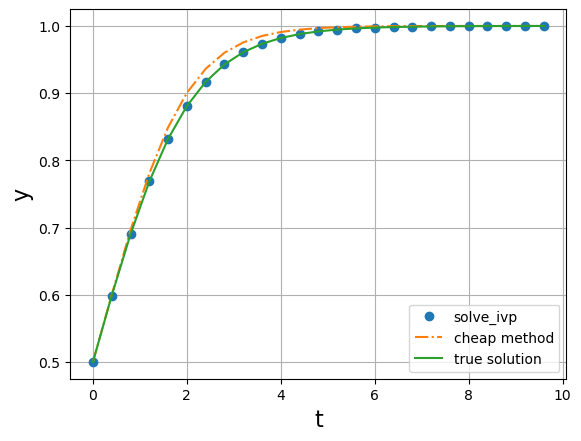

In [8]:
# Solve the 1d logistic equation from class
from scipy.integrate import solve_ivp

# Note that the function has to take t as the first argument and y as the second
def calculate_logistic_dydt(t, y):
    """Returns the gradient dx/dt for the logistic equation"""
    dydt = y*(1 - y)
    return dydt

max_time = 10.0
N_time_steps = 25
delta_t = max_time / N_time_steps
t_solution = np.linspace(0.0, max_time-delta_t, N_time_steps) # values of independent variable 
y0 = np.array([0.5]) # an initial condition, y(0) = y0, note it needs to be an array

solution = solve_ivp(calculate_logistic_dydt, [0,max_time], y0,
                        method='RK45', t_eval=t_solution)
 
plt.grid()
plt.xlabel("t", fontsize=16)
plt.ylabel("y", fontsize=16) 
plt.plot(solution.t, solution.y[0], 'o', label="solve_ivp")

# Now do it the "cheap" way 
# increase the number of steps to see how the solution changes
y_solution = np.zeros_like(t_solution)
y_solution[0] = y0
for itime, time in enumerate(t_solution) :
    if itime > 0 :
        dydt = calculate_logistic_dydt(time, y_solution[itime-1])
        y_solution[itime] = y_solution[itime-1] + dydt * delta_t
    
plt.plot(t_solution, y_solution, '-.',label="cheap method")

# Now plot the true solution
A = 1.0/y0 - 1.0
y_true = 1.0 / (1.0 + A * np.exp(-t_solution))
plt.plot(t_solution, y_true, '-', label="true solution")
plt.legend(loc='best');

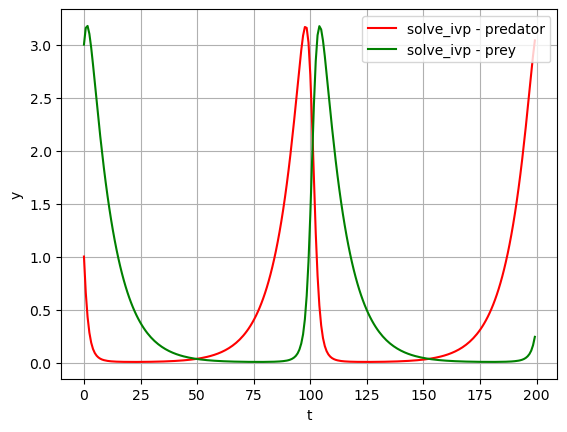

In [35]:
# Your solution here for the predator-prey equations !

def Calculate_Lotka_Volterra(t, y):
    """Returns gradient of lotka volterra ODE system"""

    # Needs parameters
    a = 0.1
    b = 0.2
    c = 0.1
    d = 0.2
    
    # y[0] and y[1] represent the dependent variables
    # X is predators y[0]
    # Y is prey y[1]
    
    dydt = np.zeros_like(y)
    
    dydt[0] = a*y[0]-b*y[0]*y[1]
    dydt[1] = -c*y[1]+d*y[0]*y[1]
    return dydt


max_time = 200.0
N_time_steps = 250
delta_t = max_time / N_time_steps
t_solution = np.linspace(0.0, max_time-delta_t, N_time_steps) # values of independent variable 
y0 = [1.0,3.0] #initial condition y(0) = y0

solution = solve_ivp(Calculate_Lotka_Volterra, [0,max_time], y0,method='RK45', t_eval=t_solution)


fig, ax = plt.subplots()
ax.set(xlabel = 't', ylabel= 'y')
ax.grid()
ax.plot(solution.t, solution.y[0], 'r-', label='solve_ivp - predator')
ax.plot(solution.t, solution.y[1], '-g', label='solve_ivp - prey')
plt.legend()
plt.show()

### ACTIVITY 5:

Find the equilibrium value of rabbits and foxes such that you do not get oscillations.

_HINT: You can do this by trying different initial values of the rabbits and foxes, but it may help to also plot the solutions of x versus y for different values of the initial conditions and identify if there is a trend_

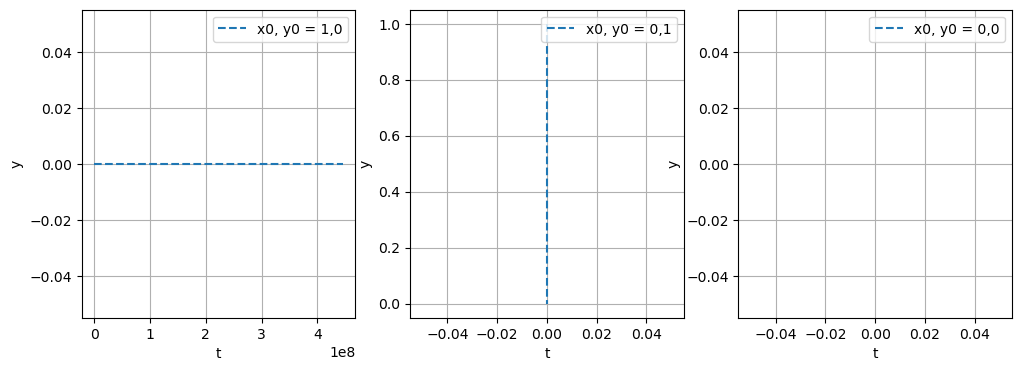

In [37]:
# Plot some solutions of x versus y

y0 = [1.0,0.0] #initial condition y(0) = y0
solution1 = solve_ivp(Calculate_Lotka_Volterra, [0,max_time], y0,method='RK45', t_eval=t_solution)

y0 = [0.0,1.0] #initial condition y(0) = y0
solution2 = solve_ivp(Calculate_Lotka_Volterra, [0,max_time], y0,method='RK45', t_eval=t_solution)

y0 = [0.0,0.0] #initial condition y(0) = y0
solution3 = solve_ivp(Calculate_Lotka_Volterra, [0,max_time], y0,method='RK45', t_eval=t_solution)


fig, axs = plt.subplots(1, 3, figsize=(12, 4))


axs[0].plot(solution1.y[0], solution1.y[1], '--', label="x0, y0 = 1,0") # equilibrium points
axs[1].plot(solution2.y[0], solution2.y[1], '--', label="x0, y0 = 0,1")
axs[2].plot(solution3.y[0], solution3.y[1], '--', label="x0, y0 = 0,0")

for ax in axs:
    ax.set(xlabel = 't', ylabel= 'y')
    ax.grid()
    ax.legend()

plt.show()


# HINT: plt.plot(solution.y[0], solution.y[1], '--', label="x0, y0 = ??")

### ACTIVITY 6:

If you double the resolution in the simple integrator, what happens to the error in the solution compared to solve_ivp? Why? How could you improve this behaviour?

In [119]:
# Compare the errors here

# HINT: plt.plot(solution.t, solution.y[0] - y_solution, '--', label="error versus solve_ivp, dt = ??")

### ACTIVITY 7:

The predator - prey equations have been cast above in a _functional coding_ style. Can you imagine a way to cast them in a more OOP way?

_HINT: There are several ways this could be done, but consider writing an Ecosystem class - what would be the attributes and methods that would live in such a class?_

OPTIONAL: Implement it!

A: UPDATE ME!

In [24]:
# Implementation of the Ecosystem class (OPTIONAL)
class ecosystem():
    